# **Exploratory Data Analysis - Retail**

Problem Statement: Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’ This task is about Exploratory Data Analysis - Retail where the task focuses on a business manager who will try to find out weak areas where he can work to make more profit.


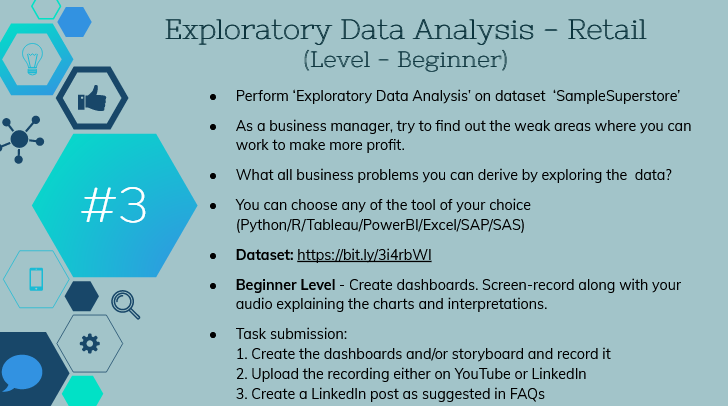

**Data Preprocessing**

In [1]:
#Importing all the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Data

df = pd.read_csv("../input/samplesuperstoreeda/SampleSuperstore.csv")
print("Data imported successfully")

In [3]:
df.head()

In [4]:
df.describe()   

In [5]:
#Check Null Values

df.isnull().sum()    

In [6]:
#Check Column Names and thier type
df.columns

In [7]:
#Check unique values in columns
df.nunique()

In [8]:
#Converting data type of Postal Code to Integer
df['Postal Code'] = df['Postal Code'].astype('object')

In [9]:
dtType = type(df['Postal Code'][0])
print(dtType)

In [10]:
#Check for Duplicates and eliminate if any

df.duplicated().sum()

In [11]:
df.drop_duplicates(subset=None,keep='first',inplace=True)
df.duplicated().sum()

**Finding Correlation**

In [12]:
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='Blues')

In [13]:
#Drop unwanted columns
df = df.drop(['Postal Code'],axis = 1) 

In [14]:
df['Ship Mode'].value_counts()

In [15]:
sns.countplot(x=df['Ship Mode'])

**Observation : *Standard class is most opted amongst all shipping class.***

In [16]:
sns.countplot(x = 'Segment',data = df, palette = 'tab10')

**Observation : *Sale is maximum from the consumer segment.***

In [17]:
sns.countplot(x='Category',data=df,palette='dark')

**Observation : *Office Supplies is the largest sold category.***

In [18]:
df['Sub-Category'].value_counts()

In [19]:
plt.figure(figsize=(15,12))
df['Sub-Category'].value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

**Observation : *Binders and Papers are largest sold sub-category.***

In [20]:
#Checking State wise sales
plt.figure(figsize=(15,12))
sns.countplot(x='State',data=df,palette='tab20c',order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

**Observation : *Maximum sale is driven from California, New York, Texas.***

In [21]:
ps = df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['Green','Red'],figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('States')
plt.ylabel('Profit/loss & Sales')
plt.show()

**Observation : *Though Texas state contributes to 3rd largest sale but it is in overall loss.***

In [22]:
plt.figure(figsize=(10,8))
df['Region'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

**Observation : *Lowest sale is from southern states***

In [23]:

plt.figure(figsize=(12,8))
plt.title('Segment wise Sales in each Region')
sns.barplot(x='Region',y='Sales',data=df,hue='Segment',order=df['Region'].value_counts().index,palette='rocket')
plt.xlabel('Region',fontsize=15)
plt.show()


**Observation : *Sale in different segment doesn't vary significantly across regions.***

In [24]:
#Checking relation between profit and discount.

fig,ax=plt.subplots(figsize=(20,15))
ax.scatter(df['Sales'],df['Profit'])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()

In [25]:
sns.lineplot(x='Discount',y='Profit',label='Profit',data=df)
plt.legend()
plt.show()

In [26]:
df.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['yellow','purple'],alpha=0.9,figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

**Observation : 
*Technology and Office Supplies have high profit.
Furniture have less profit.***